In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rc('font', family='NanumGothic')
import seaborn as sns

In [117]:
# 데이터 호출하기
# entry_data.csv, sales_data.csv, item_data.csv, item_entry_data.csv의
# 총 네 가지 파일을 각각 호출합니다.
# 파일들은 본 클라우드에 저장되어있어 다음을 참고하여 호출해주세요.
entry_data = pd.read_csv('~/aiffel/data_analysis_basic/data/entry_data.csv')
sales_data = pd.read_csv('~/aiffel/data_analysis_basic/data/sales_data.csv')
item_data = pd.read_csv('~/aiffel/data_analysis_basic/data/item_data.csv')
item_entry_data = pd.read_csv('~/aiffel/data_analysis_basic/data/item_entry_data.csv')

In [118]:
entry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요금제명    22292 non-null  object
 1   입실      22555 non-null  object
 2   퇴실      22555 non-null  object
 3   이용      22533 non-null  object
 4   위치      22555 non-null  object
 5   금액      22555 non-null  int64 
 6   구분      22555 non-null  object
 7   고객      22555 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB


In [119]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   결제일시    7105 non-null   object
 1   판매위치    7105 non-null   object
 2   상품명     7105 non-null   object
 3   결제방식    7105 non-null   object
 4   비고      7105 non-null   object
 5   판매수량    7105 non-null   int64 
 6   결제금액    7105 non-null   object
 7   고객      6300 non-null   object
dtypes: int64(1), object(7)
memory usage: 444.2+ KB


In [120]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      174 non-null    int64 
 1   분류      174 non-null    object
 2   상품명     174 non-null    object
 3   판매금액    174 non-null    object
dtypes: int64(1), object(3)
memory usage: 5.6+ KB


In [121]:
item_entry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      34 non-null     int64 
 1   분류      34 non-null     object
 2   상품명     34 non-null     object
 3   판매금액    34 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.2+ KB


In [122]:

temp_var = sales_data
temp_var.head()

# 참조 -  3-2 데이터 분석하기

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [123]:
temp_var['date'] = temp_var['결제일시'].str[:7]
temp_var.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,2022-04


In [124]:
#3-2-3 salse_data의 결제금액에는 쉼표(,)가 들어있어서 현재 문자열로 인식되고 있어요. 따라서 쉼표를 지우고, 문자열을 숫자료 바꿔줘야합니다.
# salse_data의 결제금액에 포함된 쉼표(,) 지우기
# [[YOUR CODE]]
temp_var['결제금액'] = temp_var['결제금액'].str.replace(',','')
temp_var.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04


In [125]:
# sales_data의 결제금액을 숫자형태로 바꾸기
# [[YOUR CODE]]
# data['Gross'] = data['Gross'].str.replace(',','').astype('int64')
# object 객체를 categorical 객체로 바꾸려면, pd.DataFrame.astype('category')를 사용.

#temp_var['결제금액'] =temp_var['결제금액'].pd.DataFrame.astype('category')

temp_var['결제금액'] = temp_var['결제금액'].astype('int64')
temp_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   결제일시    7105 non-null   object
 1   판매위치    7105 non-null   object
 2   상품명     7105 non-null   object
 3   결제방식    7105 non-null   object
 4   비고      7105 non-null   object
 5   판매수량    7105 non-null   int64 
 6   결제금액    7105 non-null   int64 
 7   고객      6300 non-null   object
 8   date    7105 non-null   object
dtypes: int64(2), object(7)
memory usage: 499.7+ KB


In [126]:
# temp_var의 payment열을 date 기준으로 집계하기
# 힌트: groupby() 함수를 사용하세요.


# temp_var['payment'] = temp_var['결제금액']
temp_var = temp_var['결제금액'].groupby(temp_var['date']).sum()
temp_var
#데이터프레임.groupby('그룹이되는컬럼')['계산하고 싶은 컬럼'].집계함수()
#temp_var['결제금액'].groupby(temp_var['date']).sum()
                                       
#payment_data = temp_var['payment'].groupby(temp_var['data']).sum()
#payment_data


# 참고 https://kbkb456.tistory.com/88
# 회고 : 노드 다뒤지고 검색 상당시간 해보니 데이터셋을 pandas의 read_csv() 로 불러와서
#        DataFrame을 만들어야하나 갖은 시도 다하다 '프로젝트 가이드'를 보니 어이없이 간결. 
#       코딩해논걸 보면 간단한데 내가 짜려면 무지 복잡해짐. 게다가 막상 RUN해보면 계속 에러.

date
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
2022-04      49900
Name: 결제금액, dtype: int64

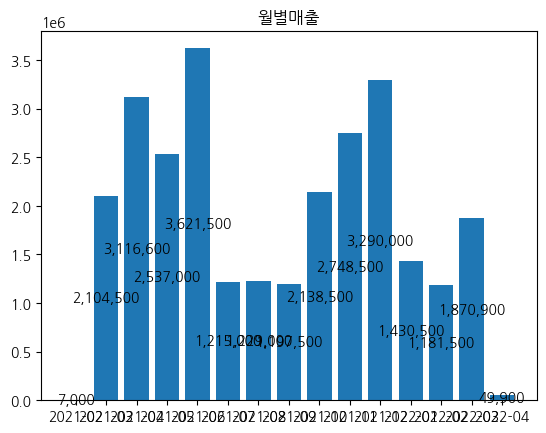

In [127]:
# 집계 결과를 시각화하기
# [[YOUR CODE]]
ax = plt.bar(temp_var.index, temp_var)
plt.bar_label(ax, labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='center')
plt.title('월별매출')
plt.show()

# 회고 : 그래프 x축 눈금명 겹치게 나와 가독력 떨어지는데 바꾸는것 검색통해 무수히 시도해보다 더 헤매서 포기.

In [128]:
#필수 문제2: 가장 인기 있는 음식/음료(salses_data를 이용합니다.)
# 여러 메뉴들(음식,음료)을 판매 개수 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.
# 힌트: value_counts() 함수를 사용하세요.

In [129]:
# temp_var의 상품명을 value_counts를 이용해 집계하기
# 주의! value_counts로 바로 집계하면 판매취소와 결제취소가 함께 집계됩니다.
# 따라서 '판매수량' 칼럼 값이 '-1'인 데이터를 제외하고 집계해야 합니다.
# 힌트 코드 : temp_var[temp_var['판매수량']==-1]
# [[YOUR CODE]]

# temp_var1 = sales_data
# temp_var.to_frame()
# minus = temp_var1[temp_var['판매수량'].contains('-1')].index
# temp_var1.drop(minus, inplace=True)
# temp_var1

temp_var = sales_data
temp_var1 = temp_var[temp_var.비고 == '결제완료']

temp_var2 = temp_var1["상품명"].value_counts()
temp_var2

#참조 https://youtu.be/zJScBhsckj4
#   https://www.delftstack.com/ko/howto/python-pandas/convert-pandas-series-to-dataframe/
#   https://blog.naver.com/nilsine11202/221667433984

#회고 ''판매수량'이 -1인걸 빼는게 계속 안돼  '비고'의 '결제완료'를 남기는 방식으로 바꿈.

김치볶음밥          1204
라면              749
짜장라면            455
치즈불고기볶음밥        420
계란추가            314
               ... 
라면(계란/치즈추가)       1
녹차(HOT)           1
짜장라면(계란추가)        1
이어폰(커널형)          1
오늘은 한돈간장불고기       1
Name: 상품명, Length: 100, dtype: int64

In [130]:
# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
# [[YOUR CODE]]
temp_var3 = temp_var2.head(10)
temp_var3.to_frame()

,상품명
김치볶음밥,1204
라면,749
짜장라면,455
치즈불고기볶음밥,420
계란추가,314
낙지볶음밥,312
새우볶음밥,309
아메리카노(ICE),284
치즈감자튀김,246
감자튀김,242


In [131]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
# [[YOUR CODE]]
#모듈 불러오는데 넣었음

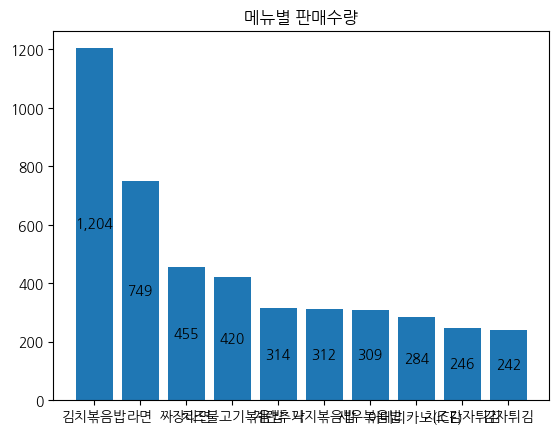

In [132]:
# 집계 결과를 시각화하기
# [[YOUR CODE]]
ax = plt.bar(temp_var3.index, temp_var3)
plt.bar_label(ax, labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='center')
plt.title('메뉴별 판매수량')
plt.show()

In [133]:
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,-4500,NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,4000,NaN,2021-02


In [134]:
#여러 메뉴들(음식,음료)을 판매 매출(판매 개수 x 결제 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.
#힌트: value_counts() 함수를 사용하세요.

temp_var['판매매출'] = (temp_var['판매수량'] * temp_var['결제금액'])  
temp_sale = temp_var[['상품명', '판매매출']]


In [135]:
# temp_var의 payment열을 상품명을 기준으로 집계하기
# [[YOUR CODE]]
temp_sale1 = temp_sale['판매매출'].groupby(temp_sale['상품명']).sum()

In [136]:
# item_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기
# [[YOUR CODE]]
temp_sale2 = temp_sale1.sort_values(ascending = False)
temp_sale3 = temp_sale2.head(10)

temp_sale3.to_frame()

,판매매출
상품명,
김치볶음밥,6036900
라면,2967000
치즈불고기볶음밥,2309100
짜장라면,2044500
낙지볶음밥,1721700
새우볶음밥,1549800
치즈감자튀김,1359700
아메리카노(ICE),1180100
감자튀김,1083800


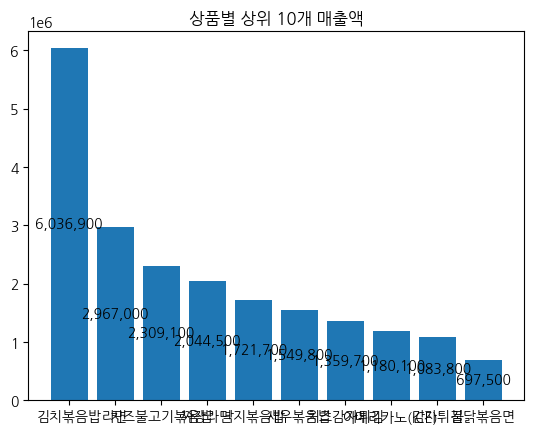

In [137]:
# 집계 결과 시각화하기
# [[YOUR CODE]]
ax = plt.bar(temp_sale3.index, temp_sale3)
plt.bar_label(ax, labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='center')
plt.title('상품별 상위 10개 매출액')
plt.show()

In [138]:
# 필수 문제3: 가장 많이 팔린 입장권 종류(entry_data를 이용합니다.)
# 여러 입장권 종류를 판매 매출(판매 개수 x 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.
# 힌트: value_counts() 함수를 사용하세요.

In [139]:
# 활용할 데이터(entry_data)를 temp_var로 정의하기
# [[YOUR CODE]]
temp_var = entry_data

In [140]:
# temp_var의 금액을 숫자형태로 변환하기
# [[YOUR CODE]]
temp_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요금제명    22292 non-null  object
 1   입실      22555 non-null  object
 2   퇴실      22555 non-null  object
 3   이용      22533 non-null  object
 4   위치      22555 non-null  object
 5   금액      22555 non-null  int64 
 6   구분      22555 non-null  object
 7   고객      22555 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB


In [141]:
# temp_var의 금액을 요금제명을 기준으로 집계하기
# [[YOUR CODE]]
temp_var = temp_var['금액'].groupby(temp_var['요금제명']).sum()
temp_var

요금제명
18시이후 무제한           1330500
1시간                   90000
1시간 요금제               14000
3시간                   21000
기간권                       0
무제한 입장권             1568600
무제한(일반요금)              6000
무제한(한국대생)             14000
시간 요금제(1시간당)          25000
시간권                       0
시간요금제                 12300
시간요금제(1시간)          2665500
시간요금제(1시간당)           22500
시간요금제(3시간)          2042000
심야-조조무제한            6221000
심야-조조무제한(06시까지)    11600000
이용권                       0
입장권(종일권)           23570500
조조무제한                693000
종일요금제                233000
한국대생 무제한 입장권        5207500
한국대생 입장권(종일권)      70037000
Name: 금액, dtype: int64

In [142]:
# tickets의 값을 내림차순으로 정렬하고 상위 10개 도출하기
# [[YOUR CODE]]
temp_var = temp_var.sort_values(ascending = False)
temp_var = temp_var.head(10)

temp_var.to_frame()

,금액
요금제명,
한국대생 입장권(종일권),70037000
입장권(종일권),23570500
심야-조조무제한(06시까지),11600000
심야-조조무제한,6221000
한국대생 무제한 입장권,5207500
시간요금제(1시간),2665500
시간요금제(3시간),2042000
무제한 입장권,1568600
18시이후 무제한,1330500


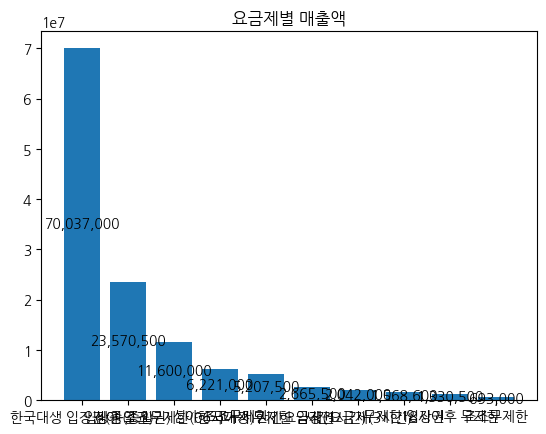

In [143]:
# 집계 결과 시각화하기
# [[YOUR CODE]]
ax = plt.bar(temp_var.index, temp_var)
plt.bar_label(ax, labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='center')
plt.title('요금제별 매출액')
plt.show()


# 회고 - 시간이 많이 모자라 다양한 시각화를 해볼 엄두도 못냈음.

### 총 회고   

- 노드에서 다 뒤저도 못찾은거 검색으로 해결하기가 매우 힘들었음.   
  특히 Pandas등의 공홈에서 뒤지는건 시간이 상당히 들어갔는데 코딩짜는데 직접적인 도움이 잘 안됐음.   

- 검색으로 문제를 해결하는데 상당히 미숙하다는걸 절감 !!!
    